In [15]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from tensorflow.keras.utils import to_categorical

In [7]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [16]:
input_size = 784
hidden_size = 64
output_size = 784

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [17]:
epochs = 5
batch_size = 128
history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.0450 - val_loss: 0.0226
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0173 - val_loss: 0.0130
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0109 - val_loss: 0.0087
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0063 - val_loss: 0.0056


313/313 [==============================] - 1s 3ms/step


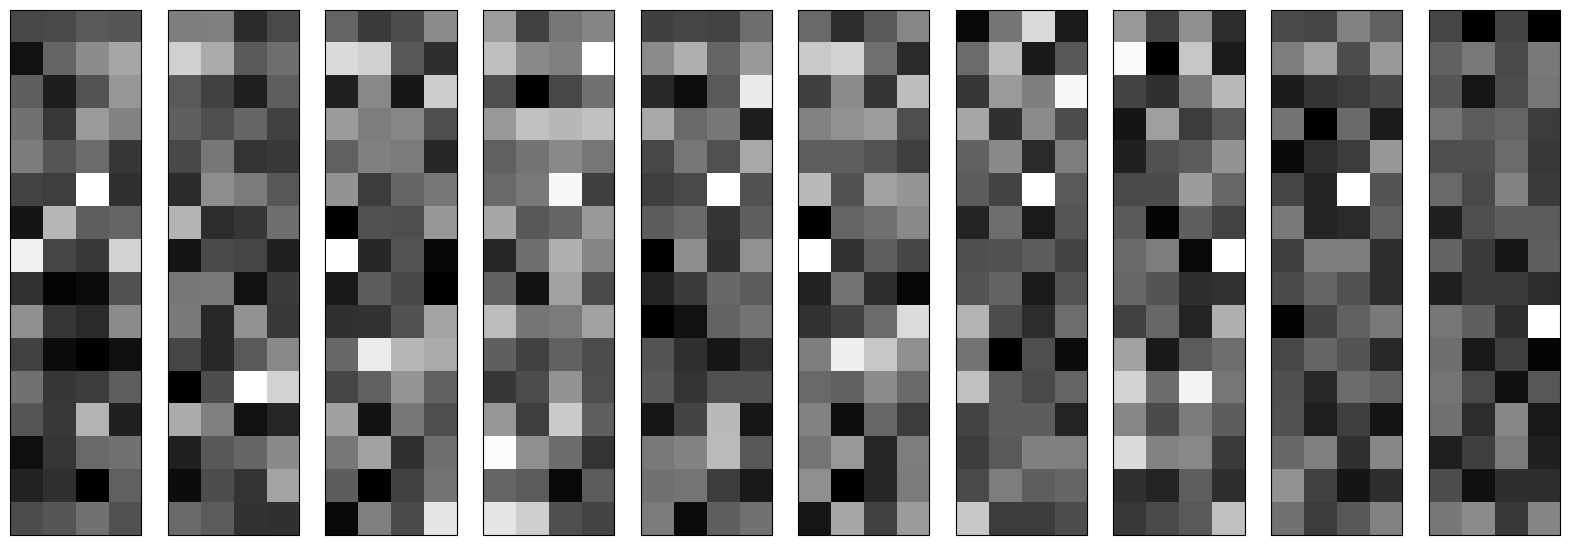

In [18]:
#creer un modele uniquement encodeur
conv_encoder = Model(x, h)
# afficher les images encodees avec l'encodeur
encoded_imgs = conv_encoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 8))
for i in  range(n):
	ax = plt.subplot(1, n, i+1)
	plt.imshow(encoded_imgs[i].reshape(4, 16).T)
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 4ms/step


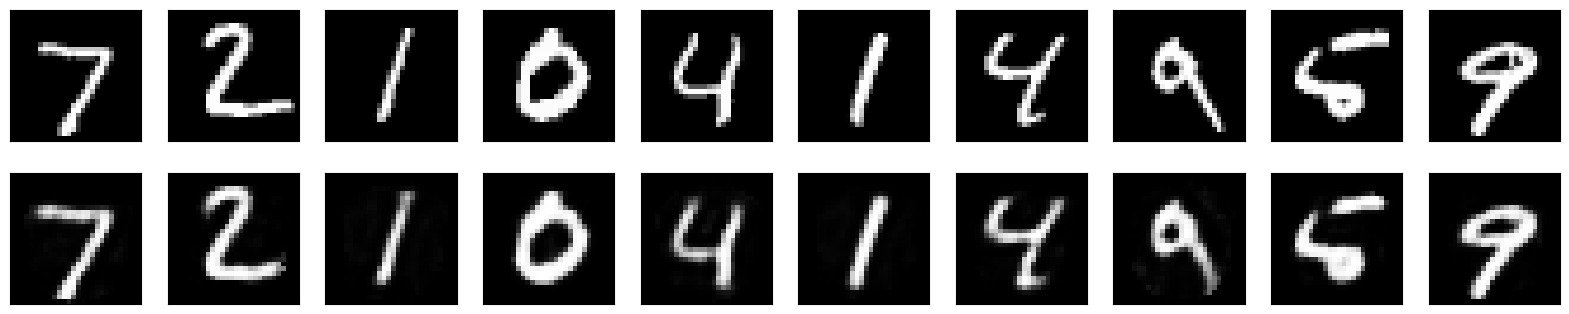

In [19]:
# Prediction du test_set
decoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 6))
for i in  range(n):
# Afficher les originaux
	ax = plt.subplot(3, n, i+1)
	plt.imshow(X_test[i].reshape(28, 28))
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
# Afficher la reconstruction
	ax = plt.subplot(3, n, i+n+1)
	plt.imshow(decoded_imgs[i].reshape(28, 28))
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
plt.show()